## Packages to be installed

In [2]:
# !pip install crepes

## Libraries

In [1]:
import pandas as pd
import numpy as np
from crepes import ConformalClassifier, ConformalPredictiveSystem
from crepes.extras import hinge, margin, binning, DifficultyEstimator

## Data

In [25]:
data_dir = "calibration_and_test.xlsx" #directory
df_cal=pd.read_excel(data_dir,sheet_name='conf_score_25') #cal dataset with conf=0.25
df_cal_tp = df_cal[df_cal['TP']==1] # True Positive Predictions Only
df_cal.columns

Index(['filename', 'image_width', 'image_height', 'gt_obj_id', 'gt_x_center',
       'gt_y_center', 'gt_obj_width', 'gt_obj_height', 'pred_obj_id', 'TP',
       'FN', 'FP', 'pred_x_center', 'pred_y_center', 'pred_obj_width',
       'pred_obj_height', 'conf_score', 'objectness_score',
       'ascaris_conf_score', 'trichuris_conf_score', 'hookworm_conf_score',
       'schistosoma_conf_score', 'ascaris_sig'],
      dtype='object')

In [56]:
df_cal = df_cal[df_cal['pred_obj_id']!='-']
df_subset= df_cal[['gt_obj_id',
        'pred_obj_id', 
        'objectness_score',
        'ascaris_conf_score',
        'trichuris_conf_score',
        'hookworm_conf_score',
        'schistosoma_conf_score']]
ascaris_df = df_subset[df_subset['pred_obj_id']==0]
trichuris_df = df_subset[df_subset['pred_obj_id']==1]
hookworm_df = df_subset[df_subset['pred_obj_id']==2]
schistosoma_df = df_subset[df_subset['pred_obj_id']==3]
# schistosoma_df['schistosoma_conf_score']
hookworm_df.shape

(157, 7)

C:\Users\M\AppData\Local\Temp\ipykernel_10696\416954682.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


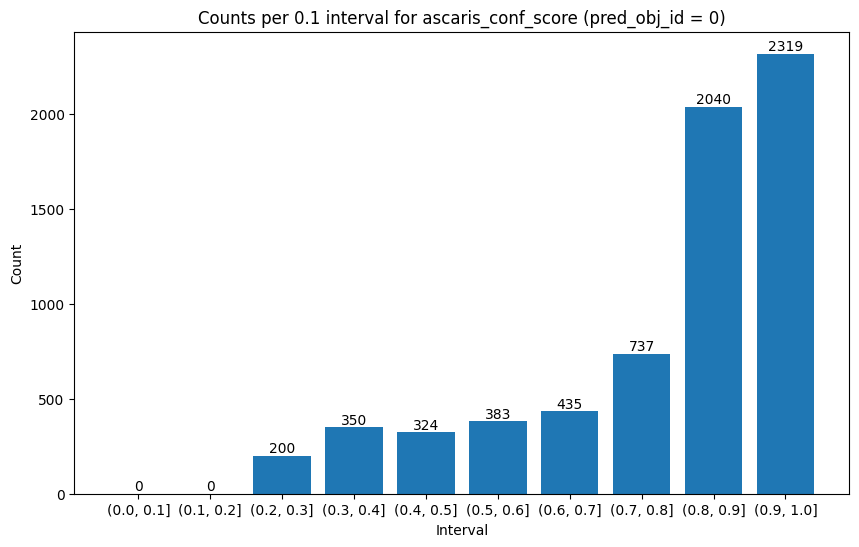

C:\Users\M\AppData\Local\Temp\ipykernel_10696\416954682.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


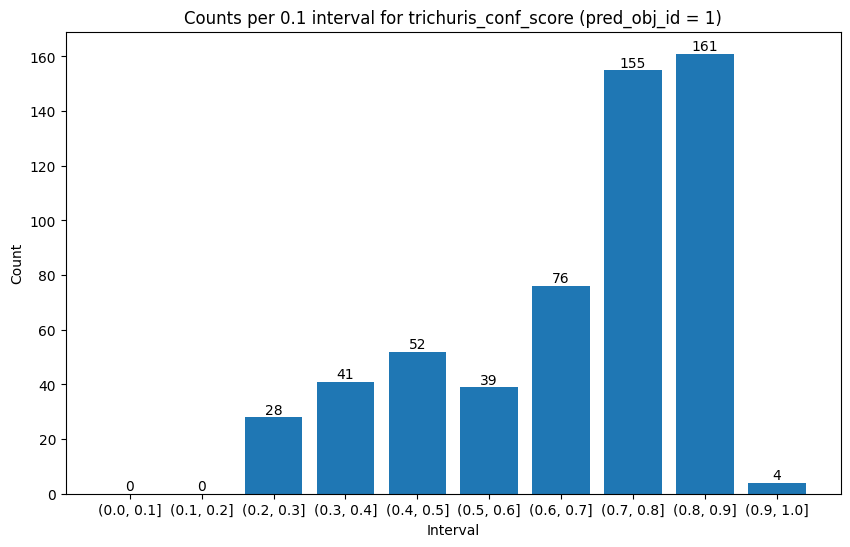

C:\Users\M\AppData\Local\Temp\ipykernel_10696\416954682.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


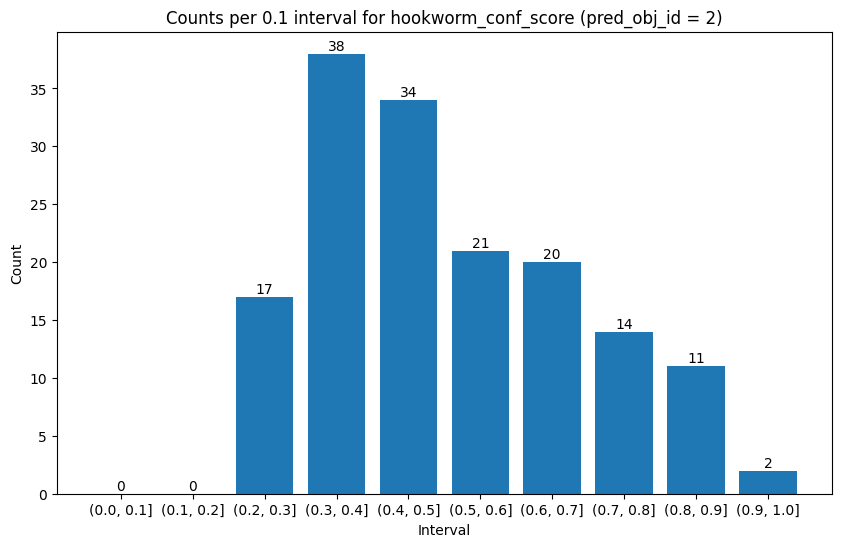

C:\Users\M\AppData\Local\Temp\ipykernel_10696\416954682.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


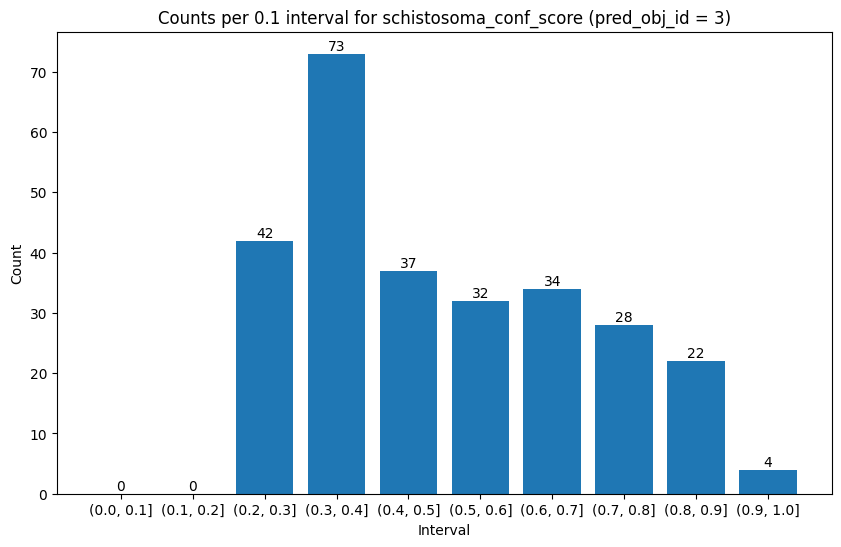

In [61]:
import matplotlib.pyplot as plt

# Define the mapping between 'pred_obj_id' and the corresponding confidence score column
mapping = {0: 'ascaris_conf_score', 1: 'trichuris_conf_score', 2: 'hookworm_conf_score', 3: 'schistosoma_conf_score'}

# Loop over the mapping
for pred_obj_id, conf_score_column in mapping.items():
    # Filter the DataFrame by 'pred_obj_id'
    df_filtered = df_subset[df_subset['pred_obj_id'] == pred_obj_id]
    
    # Categorize the data into 0.1 intervals
    df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))
    
    # Count the number of occurrences in each interval
    counts = df_filtered[conf_score_column].value_counts().sort_index()
    
    # Create a bar plot of the counts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel('Interval')
    plt.ylabel('Count')
    plt.title(f'Counts per 0.1 interval for {conf_score_column} (pred_obj_id = {pred_obj_id})')
    
    # Add the counts on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
    
    plt.show()

In [60]:
# Define the mapping between 'pred_obj_id' and the corresponding confidence score column
mapping = {0: 'ascaris_conf_score', 1: 'trichuris_conf_score', 2: 'hookworm_conf_score', 3: 'schistosoma_conf_score'}

# Loop over the mapping
for pred_obj_id, conf_score_column in mapping.items():
    # Filter the DataFrame by 'pred_obj_id'
    df_filtered = df_subset[df_subset['pred_obj_id'] == pred_obj_id]
    
    # Categorize the data into 0.1 intervals
    df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))
    
    # Count the number of occurrences in each interval
    counts = df_filtered[conf_score_column].value_counts().sort_index()
    
    print(counts)

(0.0, 0.1]       0
(0.1, 0.2]       0
(0.2, 0.3]     200
(0.3, 0.4]     350
(0.4, 0.5]     324
(0.5, 0.6]     383
(0.6, 0.7]     435
(0.7, 0.8]     737
(0.8, 0.9]    2040
(0.9, 1.0]    2319
Name: ascaris_conf_score, dtype: int64
(0.0, 0.1]      0
(0.1, 0.2]      0
(0.2, 0.3]     28
(0.3, 0.4]     41
(0.4, 0.5]     52
(0.5, 0.6]     39
(0.6, 0.7]     76
(0.7, 0.8]    155
(0.8, 0.9]    161
(0.9, 1.0]      4
Name: trichuris_conf_score, dtype: int64
(0.0, 0.1]     0
(0.1, 0.2]     0
(0.2, 0.3]    17
(0.3, 0.4]    38
(0.4, 0.5]    34
(0.5, 0.6]    21
(0.6, 0.7]    20
(0.7, 0.8]    14
(0.8, 0.9]    11
(0.9, 1.0]     2
Name: hookworm_conf_score, dtype: int64
(0.0, 0.1]     0
(0.1, 0.2]     0
(0.2, 0.3]    42
(0.3, 0.4]    73
(0.4, 0.5]    37
(0.5, 0.6]    32
(0.6, 0.7]    34
(0.7, 0.8]    28
(0.8, 0.9]    22
(0.9, 1.0]     4
Name: schistosoma_conf_score, dtype: int64


C:\Users\M\AppData\Local\Temp\ipykernel_10696\3543538291.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


In [31]:
# List of confidence score columns
conf_scores = ['ascaris_conf_score', 'trichuris_conf_score', 'hookworm_conf_score', 'schistosoma_conf_score']

# List of class ids
class_ids = df_subset['pred_obj_id'].unique()

# Create a dictionary to store the categorized data for each class id
categorized_data = {}

for class_id in class_ids:
    # Filter the DataFrame by 'pred_obj_id'
    df_filtered = df_subset[df_subset['pred_obj_id'] == class_id]
    
    # Categorize the confidence scores into intervals
    for conf_score in conf_scores:
        df_filtered[conf_score] = pd.cut(df_filtered[conf_score], bins=10, labels=False)
    
    # Store the categorized data in the dictionary
    categorized_data[class_id] = df_filtered

# Now 'categorized_data' is a dictionary where the keys are the class ids and the values are DataFrames
# that contain the categorized data for each class id
categorized_data

C:\Users\M\AppData\Local\Temp\ipykernel_10696\267004174.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score] = pd.cut(df_filtered[conf_score], bins=10, labels=False)


{0:      gt_obj_id pred_obj_id objectness_score  ascaris_conf_score  \
 0            0           0         0.536469                   0   
 1            0           0         0.784638                   0   
 4            0           0         0.584854                   1   
 6            0           0         0.498771                   0   
 7            0           0         0.552715                   0   
 ...        ...         ...              ...                 ...   
 7660         0           0         0.943195                   9   
 7673         0           0          0.94229                   9   
 7679         0           0         0.954372                   9   
 7685         0           0         0.955202                   9   
 7702         0           0         0.922155                   9   
 
       trichuris_conf_score  hookworm_conf_score  schistosoma_conf_score  
 0                        0                    7                       0  
 1                        6  

In [37]:
data_dir = "calibration_and_test.xlsx" #directory
df_cal=pd.read_excel(data_dir,sheet_name='conf_score_25') #cal dataset with conf=0.25
df_cal_tp = df_cal[df_cal['TP']==1] # True Positive Predictions Only

# 43 samples from each class
sample_size = 43
df_sampled = df_cal_tp.groupby('pred_obj_id').apply(lambda x: x.sample(sample_size))
df_sampled = df_sampled.reset_index(drop=True)

df_test=pd.read_excel(data_dir,sheet_name='test_conf_score_25') #test dataset with conf=0.25
df_test_filtered = df_test[df_test['pred_obj_id'] != '-']
df_calibration=df_sampled
df_testing=df_test_filtered

In [3]:
from my_functions import (softmax, 
                          softmax_df, 
                          calculate_logit, 
                          calculate_sigmoid, 
                          calculate_softmax,
                          calculate_hinge_scores,
                          calculate_p_values,
                          calculate_prediction_sets)

## Calibration stage

In [4]:
conf_score_cols = [
    'ascaris_conf_score', 
    'trichuris_conf_score', 
    'hookworm_conf_score', 
    'schistosoma_conf_score']
sigmoid_cols = [
    'ascaris_sigmoid', 
    'trichuris_sigmoid', 
    'hookworm_sigmoid', 
    'schistosoma_sigmoid']
logit_cols = ['ascaris_logit', 
              'trichuris_logit', 
              'hookworm_logit', 
              'schistosoma_logit']
softmax_cols = [
    'ascaris_softmax', 
    'trichuris_softmax', 
    'hookworm_softmax', 
    'schistosoma_softmax']


df_calibration = calculate_sigmoid(
    df_calibration, 
    conf_score_cols, 
    'objectness_score', 
    sigmoid_cols)
df_calibration = calculate_logit(
    df_calibration, 
    sigmoid_cols, 
    logit_cols)


df_calibration = calculate_softmax(
    df_calibration, 
    logit_cols, 
    softmax_cols, 
    softmax_df)

In [5]:
alphas_cal = hinge(
    df_calibration[[
        'ascaris_softmax',
        'trichuris_softmax',
        'hookworm_softmax',
        'schistosoma_softmax']].values,
    [0,1,2,3],df_calibration[['pred_obj_id']].values
)
cc_std = ConformalClassifier()
cc_std.fit(alphas_cal)
display(cc_std)

ConformalClassifier(fitted=True, mondrian=False)

## Testing stage

In [6]:
df_testing = calculate_sigmoid(
    df_testing, 
    conf_score_cols, 
    'objectness_score', 
    sigmoid_cols)
df_testing = calculate_logit(
    df_testing, 
    sigmoid_cols, 
    logit_cols)


df_testing = calculate_softmax(
    df_testing, 
    logit_cols, 
    softmax_cols, 
    softmax_df)


C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:

for i in df_testing[df_testing.gt_obj_id == 2]['hookworm_conf_score'].values:
    print(i)

0.27594
0.0224376
0.00878796
0.0160394
0.0148864
0.313817
0.820363
0.705813
0.763848
0.721639
0.447457
0.819711
0.770612
0.181478
0.0818176
0.00526019
0.00536
0.124408
0.256251
0.0246366
0.0117485
0.744505
0.00692887
0.00383227
0.326082
0.529683
0.00658969
0.0262103
0.0156165
0.00343948
0.0138557
0.0044584
0.00894557
0.00980684
0.0410889
0.0276675
0.0123368
0.561344
0.00418105
0.0432406
0.581301
0.730316
0.035422
0.338701
0.0270443
0.290432
0.578214
0.00631348
0.00879872
0.0226303
0.0039139


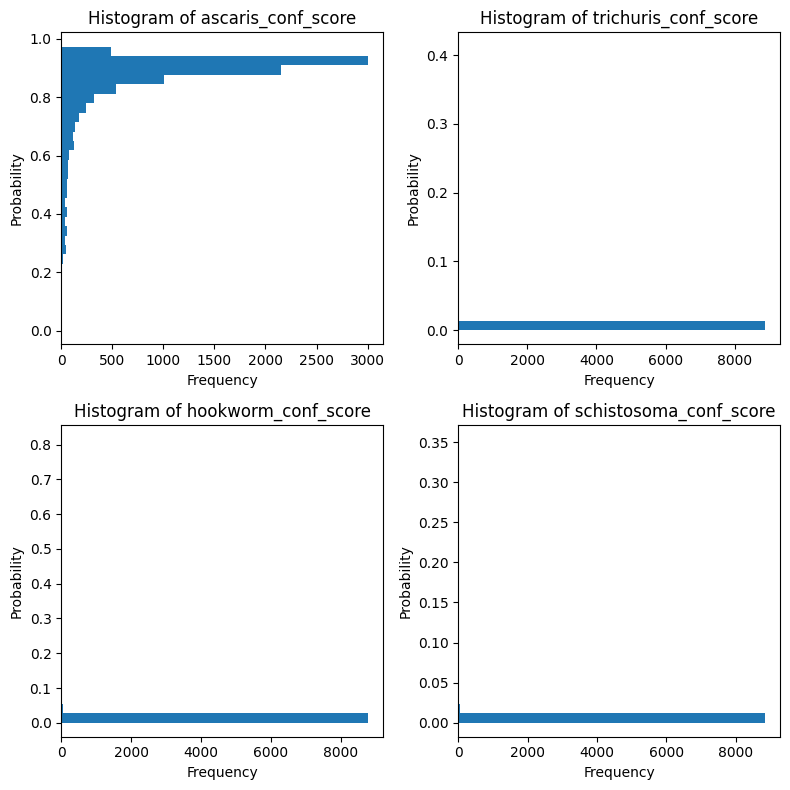

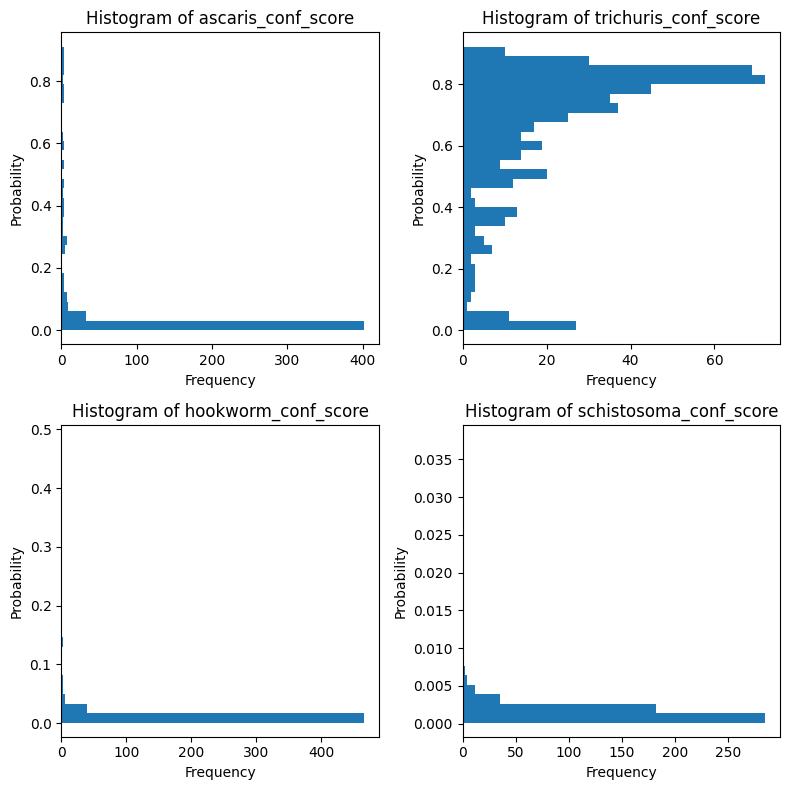

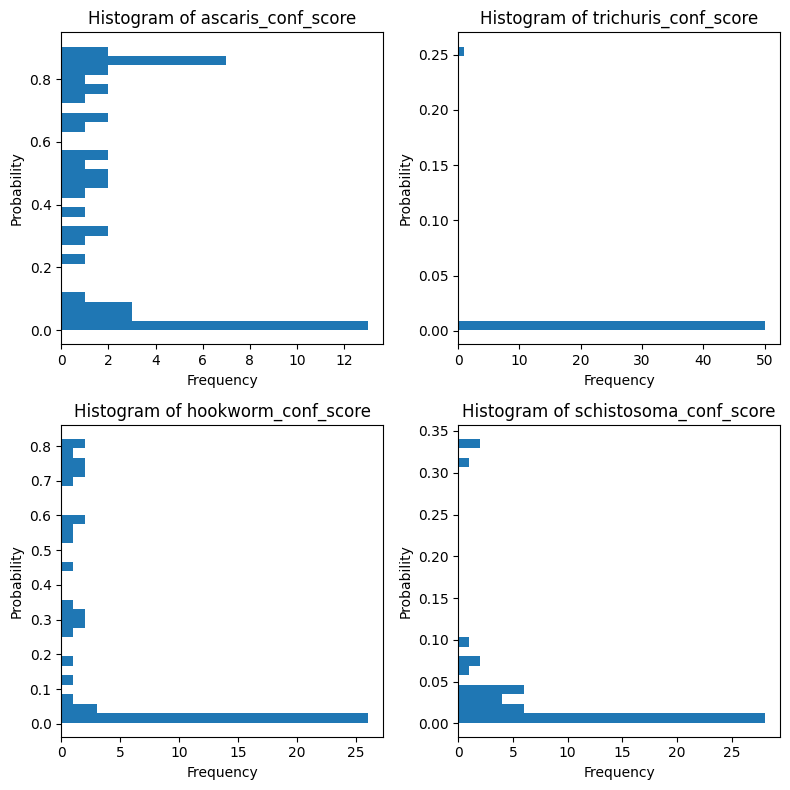

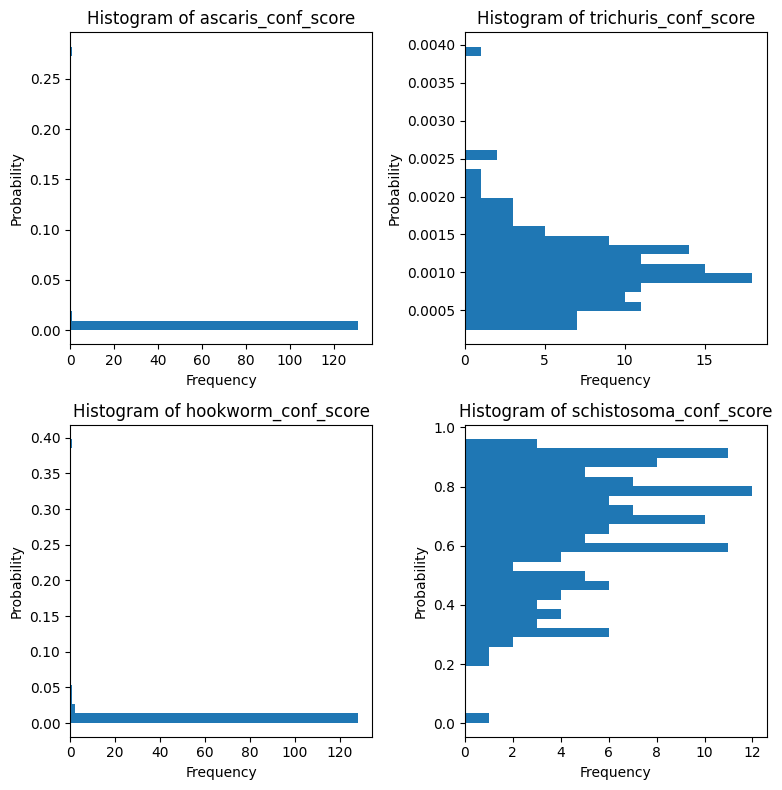

In [35]:
import matplotlib.pyplot as plt

# Select the rows where 'gt_obj_id' is 0
for i in range(4):
    df_zero = df_testing[df_testing.gt_obj_id == i]

    # Create a subplot for each class
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    for i, class_name in enumerate(['ascaris_conf_score', 'trichuris_conf_score', 'hookworm_conf_score', 'schistosoma_conf_score']):
        row = i // 2
        col = i % 2
        axs[row, col].hist(df_zero[class_name], bins=30, orientation='horizontal')
        axs[row, col].set_title('Histogram of ' + class_name)
        axs[row, col].set_xlabel('Frequency')
        axs[row, col].set_ylabel('Probability')

    plt.tight_layout()
    plt.show()

### Applying the hinge on the testing dataset

In [31]:
hinge_score_cols = [
    'ascaris_hinge_score', 
    'trichuris_hinge_score', 
    'hookworm_hinge_score', 
    'schistosoma_hinge_score']
df_testing = calculate_hinge_scores(
    df_testing, 
    softmax_cols, 
    hinge_score_cols)

In [32]:
p_value_cols = [
    'ascaris_p_value', 
    'trichuris_p_value', 
    'hookworm_p_value', 
    'schistosoma_p_value']
df_testing = calculate_p_values(
    df_testing, 
    hinge_score_cols, 
    p_value_cols, 
    cc_std)

C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [34]:
p_set_cols = [
    'ascaris_p_set', 
    'trichuris_p_set', 
    'hookworm_p_set', 
    'schistosoma_p_set']
df_testing = calculate_prediction_sets(
    df_testing, 
    hinge_score_cols, 
    p_set_cols, cc_std)

In [35]:
df_testing.to_csv('hinge_sth.csv',index=False)

In [36]:
df_testing

,filename,image_width,image_height,gt_obj_id,gt_x_center,gt_y_center,gt_obj_width,gt_obj_height,pred_obj_id,pred_x_center,...,hookworm_hinge_score,schistosoma_hinge_score,ascaris_p_value,trichuris_p_value,hookworm_p_value,schistosoma_p_value,ascaris_p_set,trichuris_p_set,hookworm_p_set,schistosoma_p_set
0,11184288_1608_36_af7b24d7-fd97-42a0-acc9-1b7a9...,1280,720,3,0.9605,0.6972,0.0773,0.1583,3,0.961328,...,0.999999,0.000001,0.005518,0.001592,0.002093,0.878089,0,0,0,1
1,11184288_1608_36_af7b24d7-fd97-42a0-acc9-1b7a9...,1280,720,0,0.4059,0.4347,0.0586,0.1278,2,0.406641,...,0.309242,0.992462,0.002181,0.002260,0.016498,0.003709,0,0,1,0
2,11184288_1608_36_af7b24d7-fd97-42a0-acc9-1b7a9...,1280,720,-,-,-,-,-,1,0.405078,...,0.831643,0.992666,0.002994,0.011567,0.002960,0.004555,0,1,0,0
3,11184394_1608_36_af7b24d7-fd97-42a0-acc9-1b7a9...,1280,720,3,0.1703,0.7111,0.0984,0.125,3,0.16875,...,0.999997,0.000005,0.000750,0.005679,0.005760,0.776523,0,0,0,1
4,11184394_1608_36_af7b24d7-fd97-42a0-acc9-1b7a9...,1280,720,-,-,-,-,-,0,0.692187,...,0.999996,0.999999,0.731049,0.003661,0.002895,0.003462,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11869,9354474_1379_31_75602595-167c-4758-8f96-e8ee5e...,1280,720,0,0.6988,0.5833,0.0602,0.0833,0,0.698828,...,0.999997,0.999999,0.778493,0.004682,0.004794,0.002298,1,0,0,0
11870,9354474_1379_31_75602595-167c-4758-8f96-e8ee5e...,1280,720,0,0.4684,0.2347,0.0586,0.1028,0,0.46875,...,0.999993,0.999998,0.702617,0.000995,0.002469,0.000178,1,0,0,0
11871,9357486_1384_31_941af06b-54a3-4552-b75f-4e6e72...,1280,720,0,0.0187,0.7007,0.0375,0.0958,0,0.019141,...,0.999941,0.999945,0.392103,0.000669,0.003752,0.004523,1,0,0,0
11873,9419118_1393_31_55d950b3-e8d5-48b7-b7a7-30014f...,1280,720,-,-,-,-,-,3,0.970312,...,0.988070,0.012391,0.004404,0.004732,0.005372,0.057322,0,0,0,1
